# Kaggle Link - https://www.kaggle.com/c/tabular-playground-series-jun-2021

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# change the permission
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
import itertools
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd


# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
              size=text_size)

In [ ]:
!kaggle competitions download -c tabular-playground-series-jun-2021

  0% 0.00/264k [00:00<?, ?B/s]
100% 264k/264k [00:00<00:00, 39.1MB/s]
 77% 5.00M/6.49M [00:00<00:00, 36.1MB/s]
100% 6.49M/6.49M [00:00<00:00, 41.5MB/s]
  0% 0.00/3.14M [00:00<?, ?B/s]
100% 3.14M/3.14M [00:00<00:00, 169MB/s]


In [ ]:
!ls

kaggle.json  sample_submission.csv.zip	train.csv.zip
sample_data  test.csv.zip


In [ ]:
!unzip test.csv.zip

Archive:  test.csv.zip
  inflating: test.csv                


In [ ]:
!unzip train.csv.zip

Archive:  train.csv.zip
  inflating: train.csv               


In [ ]:
!unzip sample_submission.csv.zip

Archive:  sample_submission.csv.zip
  inflating: sample_submission.csv   


In [ ]:
!ls

kaggle.json  sample_submission.csv	test.csv      train.csv
sample_data  sample_submission.csv.zip	test.csv.zip  train.csv.zip


In [ ]:

!rm -rf kaggle.json sample_data sample_submission.csv.zip train.csv.zip test.csv.zip

In [ ]:
!ls

sample_submission.csv  test.csv  train.csv


# **Preprocessing---------------**

In [ ]:
import pandas as pd
ss = pd.read_csv("sample_submission.csv")
ss.head(5)

,id,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9
0,200000,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111
1,200001,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111
2,200002,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111
3,200003,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111
4,200004,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111


In [ ]:
import pandas as pd
df_train = pd.read_csv("train.csv")
df_train.head(5)

,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,target
0,0,0,0,6,1,0,0,0,0,7,0,0,0,3,0,1,0,0,3,3,1,0,2,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,11,0,0,0,0,0,9,0,0,0,0,0,0,3,0,1,3,0,0,0,0,0,0,0,1,1,0,0,3,0,0,0,0,0,0,2,0,0,Class_6
1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,1,0,Class_6
2,2,0,0,0,0,0,1,0,3,0,0,1,0,0,0,0,0,0,0,0,5,4,0,0,0,0,0,0,0,0,1,0,0,0,0,2,0,0,5,0,5,0,1,0,0,0,1,0,0,1,0,7,0,1,1,0,3,4,0,0,1,3,0,2,0,0,8,0,0,0,0,1,0,0,0,0,Class_2
3,3,0,0,7,0,1,5,2,2,0,1,2,0,5,0,0,4,0,0,22,2,1,0,0,0,0,3,0,37,0,1,3,13,0,10,0,3,1,1,0,7,0,0,2,0,1,0,0,0,0,0,0,10,0,0,25,1,0,1,2,0,2,0,7,0,0,0,0,4,0,2,2,0,4,3,0,Class_8
4,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Class_2


In [ ]:
import pandas as pd
df_test = pd.read_csv("test.csv")
df_test.head(5)

,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74
0,200000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,200001,1,2,0,0,0,0,0,0,0,0,1,0,2,2,0,0,1,0,0,0,2,0,0,1,0,3,0,1,0,0,2,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,3,2,0,0,0,0,0,0,1,7,0,1,3,1,3,0,0,0,0,3,0,0
2,200002,0,1,7,1,0,0,0,0,6,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,2,0,0,4,0,0,0,0,0,0,0,0,1,0,0,4,0,0,1,0,0,0,6,0,0,2,10,0,0,0,2,1,0,0,0,0,0,3,0,0,0,0,3,0,2,0,0
3,200003,0,0,0,4,3,1,0,0,0,0,7,0,0,0,7,0,0,0,5,0,1,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,0,0,0,1,0,0,7,5,0,0,0,0,0,0,0,0,0,2,3,0,0,0,1,0,0,0,0,0,4,0,0,0,1,0,0,0,4,0,0
4,200004,0,0,5,0,0,0,0,0,0,8,1,0,2,0,0,0,0,0,9,1,0,0,0,0,0,0,0,0,3,0,5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,2,2,1,5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
list_features = []
for i in range (74):
  list_features.append(f"feature_{i+1}")

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create column transformer (this will help us normalize/preprocess our data)
ct = make_column_transformer(
    (MinMaxScaler(), list_features), # get all values between 0 and 1
)

# Create X & y
X = df_train.drop(["target", "id"], axis=1)
y = df_train["target"]


X_test_Final = df_test.drop("id", axis=1)


# Create X & y
# Build our train and test sets (use random state to ensure same split as before)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)





# Fit column transformer on the training data only (doing so on test data would result in data leakage)
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScalar) and one hot encoding (OneHotEncoder)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)
X_test_final_norm = ct.transform(X_test_Final)

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y)

LabelEncoder()

In [ ]:
list_classes = list(le.classes_)
list_classes

['Class_1',
 'Class_2',
 'Class_3',
 'Class_4',
 'Class_5',
 'Class_6',
 'Class_7',
 'Class_8',
 'Class_9']

In [ ]:
train_labels = le.transform(y_train)
test_labels = le.transform(y_test)

In [ ]:
train_data = X_train_normal
test_data = X_test_normal

In [ ]:
train_labels.shape, train_data.shape

((160000,), (160000, 74))

In [ ]:
X_test_final_norm.shape

(100000, 74)

# **Model_1**

In [ ]:
import tensorflow as tf

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(50, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(9, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # different loss function for multiclass classifcation
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
norm_history = model_1.fit(train_data,
                                train_labels,
                                epochs=50,
                                validation_data=(test_data, test_labels),
                                callbacks=[lr_scheduler]) # see how the model performs on the test set during training

Epoch 1/50
5000/5000 [==============================] - 12s 2ms/step - loss: 1.8006 - accuracy: 0.3414 - val_loss: 1.7828 - val_accuracy: 0.3473
Epoch 2/50
5000/5000 [==============================] - 9s 2ms/step - loss: 1.7739 - accuracy: 0.3523 - val_loss: 1.7737 - val_accuracy: 0.3537
Epoch 3/50
5000/5000 [==============================] - 9s 2ms/step - loss: 1.7673 - accuracy: 0.3543 - val_loss: 1.7746 - val_accuracy: 0.3522
Epoch 4/50
5000/5000 [==============================] - 9s 2ms/step - loss: 1.7633 - accuracy: 0.3556 - val_loss: 1.7711 - val_accuracy: 0.3546
Epoch 5/50
5000/5000 [==============================] - 9s 2ms/step - loss: 1.7605 - accuracy: 0.3563 - val_loss: 1.7710 - val_accuracy: 0.3555
Epoch 6/50
5000/5000 [==============================] - 9s 2ms/step - loss: 1.7581 - accuracy: 0.3577 - val_loss: 1.7698 - val_accuracy: 0.3562
Epoch 7/50
5000/5000 [==============================] - 9s 2ms/step - loss: 1.7564 - accuracy: 0.3580 - val_loss: 1.7694 - val_accuracy

In [ ]:
model_1.evaluate(test_data, test_labels)

1250/1250 [==============================] - 2s 1ms/step - loss: 1.9220 - accuracy: 0.2594


[1.92195725440979, 0.2594499886035919]

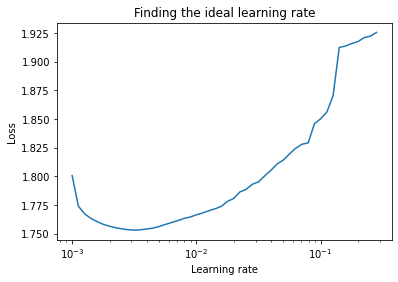

In [ ]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt
lrs = 1e-3 * (10**(np.arange(50)/20))
plt.semilogx(lrs, norm_history.history["loss"]) # want the x-axis to be log-scale
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");

# **So our best lr is 0.001**

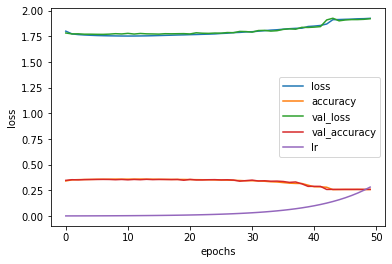

In [ ]:
import matplotlib.pyplot as plt
pd.DataFrame(norm_history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

# **CONFUSION_METRICES**

In [ ]:
y_prob_classes = model_1.predict(test_data)

y_prob_classes[:5], y_prob_classes.shape

(array([[0.05300175, 0.09273123, 0.05832354, 0.03512232, 0.00511611,
         0.31427833, 0.05660772, 0.2511653 , 0.13365373],
        [0.05300175, 0.09273123, 0.05832354, 0.03512232, 0.00511611,
         0.31427833, 0.05660772, 0.2511653 , 0.13365373],
        [0.05300175, 0.09273123, 0.05832354, 0.03512232, 0.00511611,
         0.31427833, 0.05660772, 0.2511653 , 0.13365373],
        [0.05300175, 0.09273123, 0.05832354, 0.03512232, 0.00511611,
         0.31427833, 0.05660772, 0.2511653 , 0.13365373],
        [0.05300175, 0.09273123, 0.05832354, 0.03512232, 0.00511611,
         0.31427833, 0.05660772, 0.2511653 , 0.13365373]], dtype=float32),
 (40000, 9))

In [ ]:
y_pred_classes = y_prob_classes.argmax(axis = 1)
y_pred_classes.shape, test_data.shape,test_labels.shape

((40000,), (40000, 74), (40000,))

In [ ]:
# Check out the non-prettified confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels, 
                 y_pred=y_pred_classes)

array([[    0,     0,     0,     0,     0,  1820,     0,     0,     0],
       [    0,     0,     0,     0,     0,  4924,     0,     0,     0],
       [    0,     0,     0,     0,     0,  2938,     0,     0,     0],
       [    0,     0,     0,     0,     0,   974,     0,     0,     0],
       [    0,     0,     0,     0,     0,   613,     0,     0,     0],
       [    0,     0,     0,     0,     0, 10378,     0,     1,     0],
       [    0,     0,     0,     0,     0,  2980,     0,     0,     0],
       [    0,     0,     0,     0,     0, 10350,     0,     0,     0],
       [    0,     0,     0,     0,     0,  5022,     0,     0,     0]])

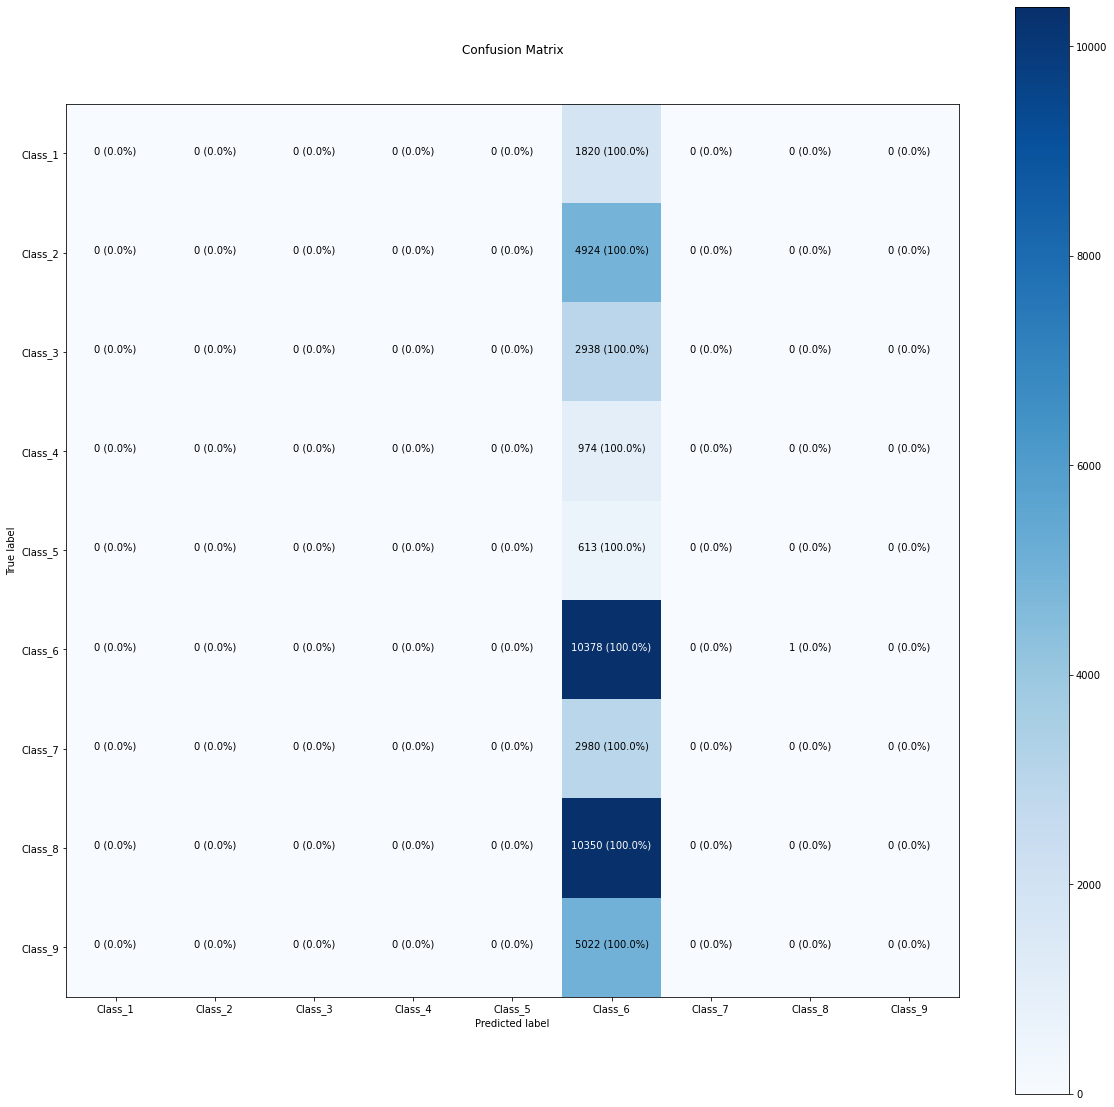

In [ ]:
make_confusion_matrix(test_labels, y_pred_classes, classes=list_classes, figsize=(20,20), text_size=10)

# Try to make submission Csv

In [ ]:
x = model_1.predict(X_test_final_norm)
x[0]

array([0.05300175, 0.09273123, 0.05832354, 0.03512232, 0.00511611,
       0.31427833, 0.05660772, 0.2511653 , 0.13365373], dtype=float32)

In [ ]:
ss.shape, x.shape

((100000, 10), (100000, 9))

In [ ]:
ss.iloc[:,1:10] = x
ss.head()

,id,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9
0,200000,0.053002,0.092731,0.058324,0.035122,0.005116,0.314278,0.056608,0.251165,0.133654
1,200001,0.053002,0.092731,0.058324,0.035122,0.005116,0.314278,0.056608,0.251165,0.133654
2,200002,0.053002,0.092731,0.058324,0.035122,0.005116,0.314278,0.056608,0.251165,0.133654
3,200003,0.053002,0.092731,0.058324,0.035122,0.005116,0.314278,0.056608,0.251165,0.133654
4,200004,0.053002,0.092731,0.058324,0.035122,0.005116,0.314278,0.056608,0.251165,0.133654


In [ ]:
from google.colab import files
import pandas as pd
ss.to_csv('sample_submission_1.csv')
files.download('sample_submission_1.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# But our Model is weak try another model

# **Model_2**

In [ ]:
train_data.shape, test_data.shape

((160000, 74), (40000, 74))

In [ ]:
train_labels.shape, test_labels.shape

((160000,), (40000,))

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dropout(.2, input_shape=(2,)),
  tf.keras.layers.Dense(50, activation="relu"),
  tf.keras.layers.Dense(9, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # different loss function for multiclass classifcation
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])


# Fit the model
norm_history = model_2.fit(train_data,
                                train_labels,
                                epochs=50,
                                validation_data=(test_data, test_labels),) # see how the model performs on the test set during training

Epoch 1/50
5000/5000 [==============================] - 10s 2ms/step - loss: 1.8048 - accuracy: 0.3414 - val_loss: 1.7806 - val_accuracy: 0.3516
Epoch 2/50
5000/5000 [==============================] - 10s 2ms/step - loss: 1.7763 - accuracy: 0.3504 - val_loss: 1.7721 - val_accuracy: 0.3543
Epoch 3/50
5000/5000 [==============================] - 10s 2ms/step - loss: 1.7692 - accuracy: 0.3529 - val_loss: 1.7703 - val_accuracy: 0.3552
Epoch 4/50
5000/5000 [==============================] - 10s 2ms/step - loss: 1.7644 - accuracy: 0.3554 - val_loss: 1.7665 - val_accuracy: 0.3552
Epoch 5/50
5000/5000 [==============================] - 10s 2ms/step - loss: 1.7607 - accuracy: 0.3566 - val_loss: 1.7658 - val_accuracy: 0.3570
Epoch 6/50
5000/5000 [==============================] - 10s 2ms/step - loss: 1.7573 - accuracy: 0.3576 - val_loss: 1.7648 - val_accuracy: 0.3577
Epoch 7/50
5000/5000 [==============================] - 10s 2ms/step - loss: 1.7552 - accuracy: 0.3584 - val_loss: 1.7646 - val_ac

In [ ]:
model_2.evaluate(test_data, test_labels)

1250/1250 [==============================] - 2s 1ms/step - loss: 1.7786 - accuracy: 0.3527


[1.7785632610321045, 0.3526749908924103]

In [ ]:
y_prob_classes = model_2.predict(test_data)

y_prob_classes[:5], y_prob_classes.shape

(array([[0.03787904, 0.12537862, 0.08345295, 0.03524613, 0.01977641,
         0.327878  , 0.05515453, 0.18069337, 0.13454098],
        [0.0112237 , 0.00867612, 0.00558541, 0.00522091, 0.00173695,
         0.84365004, 0.01528922, 0.09297717, 0.01564049],
        [0.05443028, 0.18984003, 0.14223635, 0.03580118, 0.01949129,
         0.15871708, 0.05234063, 0.15463635, 0.19250678],
        [0.04271275, 0.06150195, 0.05055571, 0.0258847 , 0.02147555,
         0.2942822 , 0.08887672, 0.293867  , 0.12084351],
        [0.05982124, 0.25433627, 0.11462213, 0.04317983, 0.01484986,
         0.1942539 , 0.0496124 , 0.12155636, 0.147768  ]], dtype=float32),
 (40000, 9))

In [ ]:
# Convert all of the predictions from probabilities to labels
y_preds = y_prob_classes.argmax(axis=1)
y_preds

array([5, 5, 8, ..., 5, 5, 5])

In [ ]:
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (32, 100)                 7500      
_________________________________________________________________
dropout (Dropout)            (32, 100)                 0         
_________________________________________________________________
dense_8 (Dense)              (32, 50)                  5050      
_________________________________________________________________
dense_9 (Dense)              (32, 9)                   459       
Total params: 13,009
Trainable params: 13,009
Non-trainable params: 0
_________________________________________________________________


# **Model_3---Adding More Layers**

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(32, activation="relu"),
  tf.keras.layers.Dropout(.1),
  tf.keras.layers.Dense(64, activation="relu"),
  tf.keras.layers.Dropout(.2),
  tf.keras.layers.Dense(64, activation="relu"),
  tf.keras.layers.Dropout(.5),
  tf.keras.layers.Dense(64, activation="relu"),
   tf.keras.layers.Dropout(.5),
  tf.keras.layers.Dense(32, activation="relu"),
  tf.keras.layers.Dropout(.1),
  tf.keras.layers.Dense(9, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # different loss function for multiclass classifcation
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])


# Fit the model
norm_history = model_3.fit(train_data,
                                train_labels,
                                epochs=50,
                                validation_data=(test_data, test_labels),) # see how the model performs on the test set during training

Epoch 1/50
5000/5000 [==============================] - 12s 2ms/step - loss: 1.8415 - accuracy: 0.3160 - val_loss: 1.7924 - val_accuracy: 0.3470
Epoch 2/50
5000/5000 [==============================] - 12s 2ms/step - loss: 1.8038 - accuracy: 0.3403 - val_loss: 1.7855 - val_accuracy: 0.3496
Epoch 3/50
5000/5000 [==============================] - 12s 2ms/step - loss: 1.7965 - accuracy: 0.3427 - val_loss: 1.7804 - val_accuracy: 0.3540
Epoch 4/50
5000/5000 [==============================] - 12s 2ms/step - loss: 1.7910 - accuracy: 0.3449 - val_loss: 1.7795 - val_accuracy: 0.3535
Epoch 5/50
5000/5000 [==============================] - 12s 2ms/step - loss: 1.7885 - accuracy: 0.3467 - val_loss: 1.7804 - val_accuracy: 0.3546
Epoch 6/50
5000/5000 [==============================] - 12s 2ms/step - loss: 1.7861 - accuracy: 0.3471 - val_loss: 1.7772 - val_accuracy: 0.3546
Epoch 7/50
5000/5000 [==============================] - 12s 2ms/step - loss: 1.7844 - accuracy: 0.3487 - val_loss: 1.7780 - val_ac

In [ ]:
model_3.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (32, 32)                  2400      
_________________________________________________________________
dropout_1 (Dropout)          (32, 32)                  0         
_________________________________________________________________
dense_11 (Dense)             (32, 64)                  2112      
_________________________________________________________________
dropout_2 (Dropout)          (32, 64)                  0         
_________________________________________________________________
dense_12 (Dense)             (32, 64)                  4160      
_________________________________________________________________
dropout_3 (Dropout)          (32, 64)                  0         
_________________________________________________________________
dense_13 (Dense)             (32, 64)                 

In [ ]:
model_3.evaluate(test_data, test_labels)

1250/1250 [==============================] - 2s 1ms/step - loss: 1.7757 - accuracy: 0.3546


[1.775678277015686, 0.3546000123023987]

In [ ]:
x_3 = model_3.predict(X_test_final_norm)
x_3[0]

array([0.06137218, 0.30788264, 0.1595459 , 0.0350461 , 0.01807284,
       0.16712213, 0.0338959 , 0.08708695, 0.12997532], dtype=float32)

In [ ]:
ss.iloc[:,1:10] = x
ss.head()

,id,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9
0,200000,0.053002,0.092731,0.058324,0.035122,0.005116,0.314278,0.056608,0.251165,0.133654
1,200001,0.053002,0.092731,0.058324,0.035122,0.005116,0.314278,0.056608,0.251165,0.133654
2,200002,0.053002,0.092731,0.058324,0.035122,0.005116,0.314278,0.056608,0.251165,0.133654
3,200003,0.053002,0.092731,0.058324,0.035122,0.005116,0.314278,0.056608,0.251165,0.133654
4,200004,0.053002,0.092731,0.058324,0.035122,0.005116,0.314278,0.056608,0.251165,0.133654


In [ ]:
from google.colab import files
import pandas as pd
ss.to_csv('sample_submission_3.csv')
files.download('sample_submission_3.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Model_4**

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(32, activation="relu"),
  tf.keras.layers.Dropout(.1),
  tf.keras.layers.Dense(64, activation="relu"),
  tf.keras.layers.Dense(64, activation="relu"),
  tf.keras.layers.Dropout(.2),
  tf.keras.layers.Dense(64, activation="relu"),
  tf.keras.layers.Dense(64, activation="relu"),
  tf.keras.layers.Dropout(.4),
  tf.keras.layers.Dense(64, activation="relu"),
  tf.keras.layers.Dense(64, activation="relu"),
   tf.keras.layers.Dropout(.4),
  tf.keras.layers.Dense(32, activation="relu"),
  tf.keras.layers.Dropout(.1),
  tf.keras.layers.Dense(9, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # different loss function for multiclass classifcation
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 metrics=["accuracy"])


# Fit the model
norm_history = model_4.fit(train_data,
                                train_labels,
                                epochs=50,
                                validation_data=(test_data, test_labels),) # see how the model performs on the test set during training

Epoch 1/50
5000/5000 [==============================] - 14s 3ms/step - loss: 1.8340 - accuracy: 0.3202 - val_loss: 1.7921 - val_accuracy: 0.3463
Epoch 2/50
5000/5000 [==============================] - 14s 3ms/step - loss: 1.7992 - accuracy: 0.3419 - val_loss: 1.7916 - val_accuracy: 0.3486
Epoch 3/50
5000/5000 [==============================] - 13s 3ms/step - loss: 1.7927 - accuracy: 0.3436 - val_loss: 1.7817 - val_accuracy: 0.3466
Epoch 4/50
5000/5000 [==============================] - 13s 3ms/step - loss: 1.7887 - accuracy: 0.3455 - val_loss: 1.7817 - val_accuracy: 0.3483
Epoch 5/50
5000/5000 [==============================] - 14s 3ms/step - loss: 1.7865 - accuracy: 0.3461 - val_loss: 1.7820 - val_accuracy: 0.3528
Epoch 6/50
5000/5000 [==============================] - 14s 3ms/step - loss: 1.7839 - accuracy: 0.3482 - val_loss: 1.7775 - val_accuracy: 0.3515
Epoch 7/50
5000/5000 [==============================] - 15s 3ms/step - loss: 1.7814 - accuracy: 0.3490 - val_loss: 1.7794 - val_ac

In [ ]:
model_4.evaluate(test_data, test_labels)

1250/1250 [==============================] - 2s 2ms/step - loss: 1.7770 - accuracy: 0.3528


[1.776987075805664, 0.35282498598098755]

In [ ]:
model_4.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (32, 32)                  2400      
_________________________________________________________________
dropout_16 (Dropout)         (32, 32)                  0         
_________________________________________________________________
dense_32 (Dense)             (32, 64)                  2112      
_________________________________________________________________
dense_33 (Dense)             (32, 64)                  4160      
_________________________________________________________________
dropout_17 (Dropout)         (32, 64)                  0         
_________________________________________________________________
dense_34 (Dense)             (32, 64)                  4160      
_________________________________________________________________
dense_35 (Dense)             (32, 64)                 

# **Model_5--Without Preprocessing**

In [ ]:
X_train.shape

(160000, 75)

In [ ]:
X_train

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74
153248,0,0,0,2,0,1,0,0,0,0,1,0,4,2,0,0,1,1,4,1,0,0,4,0,6,6,4,0,1,0,0,1,1,1,0,5,0,3,3,2,0,2,2,6,0,3,41,0,1,0,2,1,1,6,28,55,1,0,0,0,1,4,0,0,1,3,0,5,0,0,0,4,2,0,0
67802,3,0,1,2,0,0,0,0,0,1,0,3,1,1,1,1,0,0,0,0,0,0,0,1,0,1,1,0,9,0,0,0,0,5,0,0,0,2,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,3,2,7,0,0,0,1,2,0,0,0,0,3,0,0,2,4,0,0,1,0,0
148889,0,0,0,4,1,0,6,0,38,4,0,0,17,1,7,0,1,4,1,8,2,0,0,0,0,4,1,0,0,5,0,1,2,1,2,1,1,4,0,0,1,0,5,0,7,2,0,0,0,0,0,33,1,2,16,1,4,1,0,3,0,2,1,0,3,0,0,0,0,0,0,0,7,6,6
103093,0,3,6,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,2,1,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,1,0,12,1,2,0,0,0,7,0,0,1,1,0,0,1,0,1,1,0,2,0,1,0,2,4,0,0,0,2,0,0,0,1,0,0,0,0,0
104681,0,0,0,0,1,0,3,0,0,0,0,0,3,0,3,0,0,0,0,3,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,4,0,6,1,0,0,4,7,0,0,0,1,0,0,0,1,0,0,8,0,4,1,0,2,0,0,0,0,1,0,0,0,1,1,1,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,2,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,2,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,10,1,0,0,3,0,0,0,3,0,1,0,0,0,2,1,1,0,0,0,0,0,0,2,1,0,3,2,0
103694,3,3,52,8,1,4,2,1,6,0,1,0,1,0,4,1,8,0,1,11,0,1,4,0,66,4,0,0,0,3,1,4,0,2,0,19,4,1,0,8,1,0,0,1,0,1,1,0,2,0,2,4,1,2,2,16,3,4,17,4,0,0,0,0,0,1,4,5,0,0,24,0,1,0,2
131932,0,1,2,9,0,1,0,1,5,0,0,0,2,0,2,0,0,0,2,0,1,0,0,0,0,0,0,0,0,1,0,7,0,1,0,0,0,0,1,0,0,4,0,4,4,0,1,1,1,0,1,7,1,0,6,1,2,0,0,0,4,2,0,0,0,13,1,46,1,0,0,0,4,6,0
146867,1,0,2,1,0,2,0,1,3,0,0,0,1,1,3,0,0,0,1,3,1,0,0,0,0,0,2,0,1,0,1,4,0,1,0,0,0,3,0,0,3,0,0,10,2,0,2,0,0,0,2,0,0,5,2,0,2,0,1,0,0,0,2,2,0,1,0,0,0,0,2,0,0,1,0


In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_5 = tf.keras.Sequential([
  tf.keras.layers.Dense(32, activation="relu"),
  tf.keras.layers.Dropout(.1),
  tf.keras.layers.Dense(64, activation="relu"),
  tf.keras.layers.Dense(64, activation="relu"),
  tf.keras.layers.Dropout(.2),
  tf.keras.layers.Dense(64, activation="relu"),
  tf.keras.layers.Dense(64, activation="relu"),
  tf.keras.layers.Dropout(.4),
  tf.keras.layers.Dense(64, activation="relu"),
  tf.keras.layers.Dense(64, activation="relu"),
   tf.keras.layers.Dropout(.4),
  tf.keras.layers.Dense(32, activation="relu"),
  tf.keras.layers.Dropout(.1),
  tf.keras.layers.Dense(9, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_5.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # different loss function for multiclass classifcation
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 metrics=["accuracy"])


# Fit the model
norm_history_5 = model_5.fit(X_train,
                                train_labels,
                                epochs=50,
                                validation_data=(X_test, test_labels),) # see how the model performs on the test set during training

Epoch 1/50
5000/5000 [==============================] - 14s 3ms/step - loss: 1.8482 - accuracy: 0.3135 - val_loss: 1.7978 - val_accuracy: 0.3380
Epoch 2/50
5000/5000 [==============================] - 14s 3ms/step - loss: 1.8052 - accuracy: 0.3381 - val_loss: 1.7902 - val_accuracy: 0.3458
Epoch 3/50
5000/5000 [==============================] - 14s 3ms/step - loss: 1.7973 - accuracy: 0.3411 - val_loss: 1.7844 - val_accuracy: 0.3528
Epoch 4/50
5000/5000 [==============================] - 15s 3ms/step - loss: 1.7935 - accuracy: 0.3416 - val_loss: 1.7807 - val_accuracy: 0.3509
Epoch 5/50
5000/5000 [==============================] - 14s 3ms/step - loss: 1.7894 - accuracy: 0.3457 - val_loss: 1.7865 - val_accuracy: 0.3504
Epoch 6/50
5000/5000 [==============================] - 14s 3ms/step - loss: 1.7869 - accuracy: 0.3463 - val_loss: 1.7808 - val_accuracy: 0.3510
Epoch 7/50
5000/5000 [==============================] - 14s 3ms/step - loss: 1.7860 - accuracy: 0.3459 - val_loss: 1.7816 - val_ac